In [28]:
library(caret)
library(dplyr)
library(cluster)
library(sampling)
library(VIM)
library(mice)
library(stats)
library(ModelMetrics)
library(randomForest)
library(forecast)
library(Rcpp) 
library(RSNNS)
library(MASS)
library(grid)
library(neuralnet)
library(FNN)


Attaching package: ‘sampling’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep


Attaching package: ‘RSNNS’

The following object is masked from ‘package:ModelMetrics’:

    confusionMatrix

The following objects are masked from ‘package:caret’:

    confusionMatrix, train


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘neuralnet’

The following object is maske

In [3]:
setwd("~/Documents/INFO7390 Data Science/case study 2")
f <- read.csv("./training set/features.csv")
ts <- read.csv("./training set/loandata_2.csv")

In [4]:
set.seed(1222)
sub<-sample(1:nrow(ts),round(nrow(ts)*1/100))
length(sub)
data_train<-ts[sub,]

[1] 15241

In [6]:
# Data
co <- c(names(f),'int_rate')
x <- data_train[,co]

In [7]:
# Missing value
x[x == ""] <- NA
x <- x[complete.cases(x),]

In [8]:
# Pre
x[,9:12] <- data.frame(apply(x[,9:12], 2, as.factor))
# Change factor into numeric
for (i in 9:12)
    x[,i] <- as.numeric(x[,i])
x[,13:14] <- data.frame(lapply(x[,13:14], function(x) as.numeric(sub("%", "", x))/100))

In [14]:
f <- as.formula(paste("int_rate ~", paste(names(x[,-c(9,14:15)]), collapse = " + ")))

In [26]:
term_list <- c(1,2)


Call:
lm(formula = f, data = a.train, na.action = na.omit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.067606 -0.004279 -0.000759  0.002747  0.043282 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.233e-02  5.741e-04  73.740  < 2e-16 ***
annual_inc           4.146e-09  1.798e-09   2.306 0.021148 *  
dti                  1.651e-07  5.930e-06   0.028 0.977789    
last_pymnt_amnt     -5.176e-08  2.480e-08  -2.087 0.036929 *  
mths_since_rcnt_il   3.373e-07  4.561e-06   0.074 0.941053    
all_util            -2.209e-05  7.938e-06  -2.783 0.005411 ** 
total_rev_hi_lim     1.310e-08  3.855e-09   3.398 0.000686 ***
inq_last_12m        -1.447e-04  4.978e-05  -2.907 0.003668 ** 
percent_bc_gt_75    -7.432e-06  4.607e-06  -1.613 0.106819    
grade                2.320e-03  4.036e-04   5.749 9.79e-09 ***
sub_grade            7.417e-03  8.126e-05  91.273  < 2e-16 ***
verification_status -1.879e-04  1.605e-04  -1.171 0.241

Warning message in temp[1] <- a.lm:
“被替换的项目不是替换值长度的倍数”

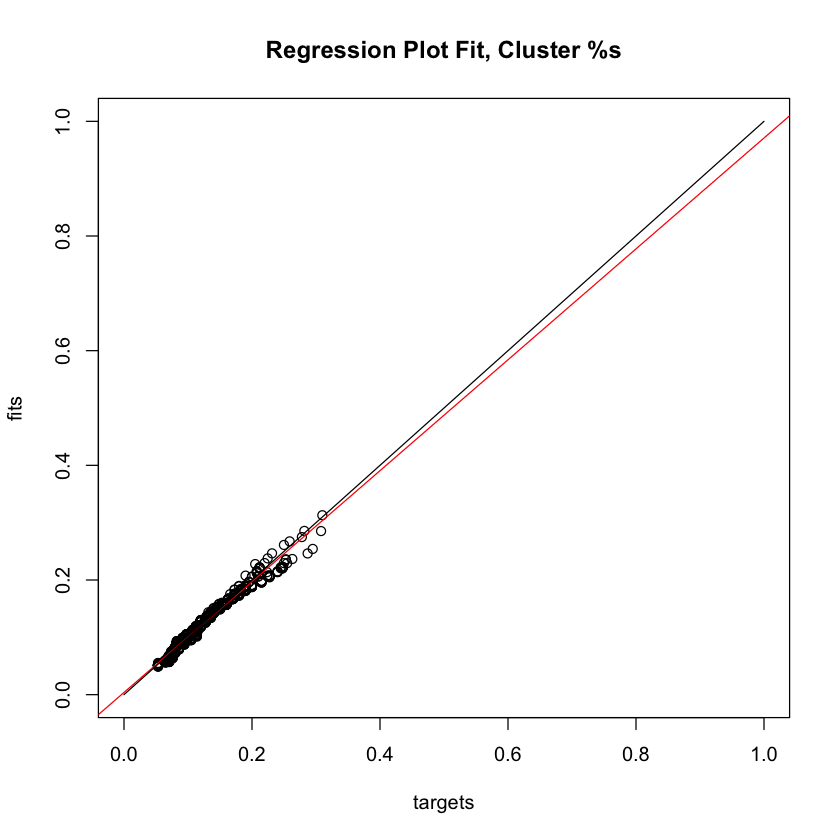

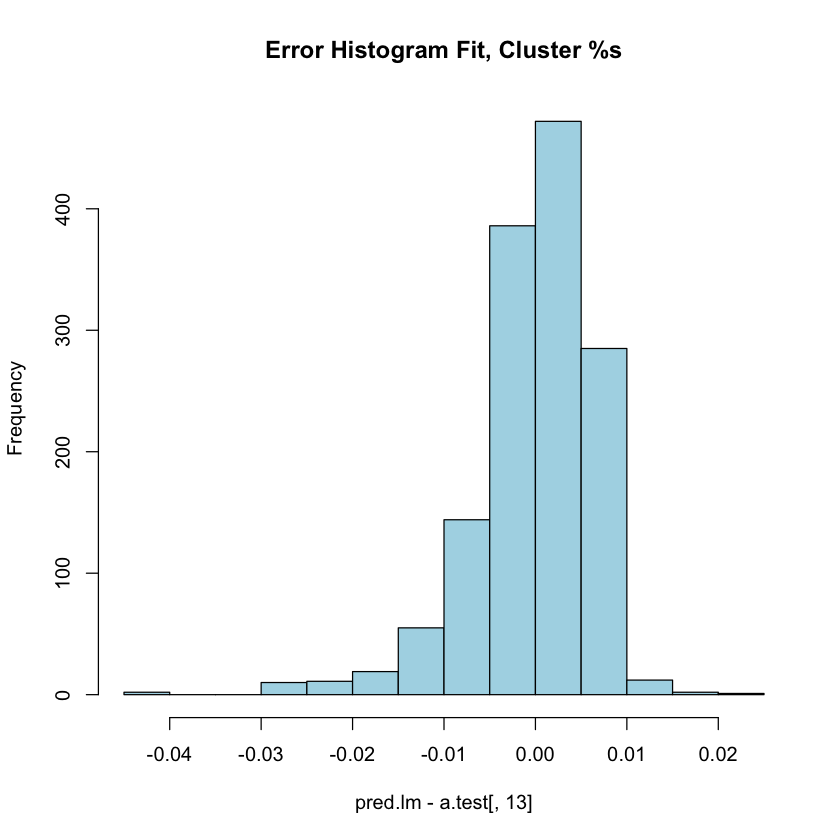

                   ME        RMSE         MAE        MPE     MAPE
Test set 3.243618e-05 0.005852535 0.003721659 -0.3346248 3.101419


Warning message in temp[2] <- a.rf:
“被替换的项目不是替换值长度的倍数”

SNNS network definition file V1.4-3D
generated at Sun Nov 19 14:26:21 2017

network name : RSNNS_untitled
source files :
no. of units : 30
no. of connections : 224
no. of unit types : 0
no. of site types : 0


learning function : Std_Backpropagation
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0.00000 |  0.00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName                  | act      | bias     | st | position | act func     | out func | sites
----|----------|---------------------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_annual_inc          | 32500.00000 | -0.14952 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_dti  

Warning message in temp[3] <- a.nn:
“被替换的项目不是替换值长度的倍数”

                  ME       RMSE        MAE       MPE     MAPE
Test set 0.001329099 0.04220296 0.03289989 -10.43652 30.24004


Warning message in temp[4] <- a.knn:
“被替换的项目不是替换值长度的倍数”Warning message in model[i] <- temp:
“被替换的项目不是替换值长度的倍数”

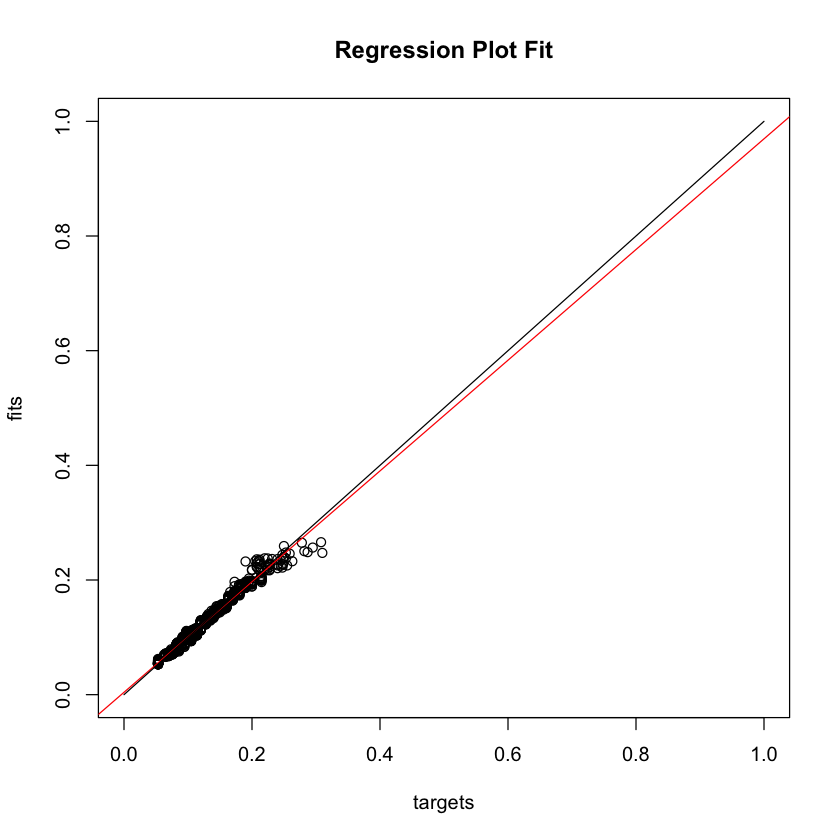


Call:
lm(formula = f, data = a.train, na.action = na.omit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065298 -0.004730 -0.000247  0.004037  0.035709 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.213e-02  1.805e-03  17.798   <2e-16 ***
annual_inc           6.369e-09  7.952e-09   0.801   0.4234    
dti                 -5.172e-05  3.646e-05  -1.418   0.1563    
last_pymnt_amnt     -8.045e-08  4.109e-08  -1.958   0.0505 .  
mths_since_rcnt_il   1.673e-06  1.358e-05   0.123   0.9020    
all_util            -2.911e-05  2.306e-05  -1.262   0.2072    
total_rev_hi_lim     1.086e-08  9.069e-09   1.198   0.2313    
inq_last_12m        -2.708e-04  1.478e-04  -1.833   0.0671 .  
percent_bc_gt_75    -7.073e-06  1.299e-05  -0.544   0.5864    
grade                2.445e-03  1.080e-03   2.264   0.0237 *  
sub_grade            8.047e-03  2.195e-04  36.659   <2e-16 ***
verification_status  3.212e-04  4.105e-04   0.783   0.4

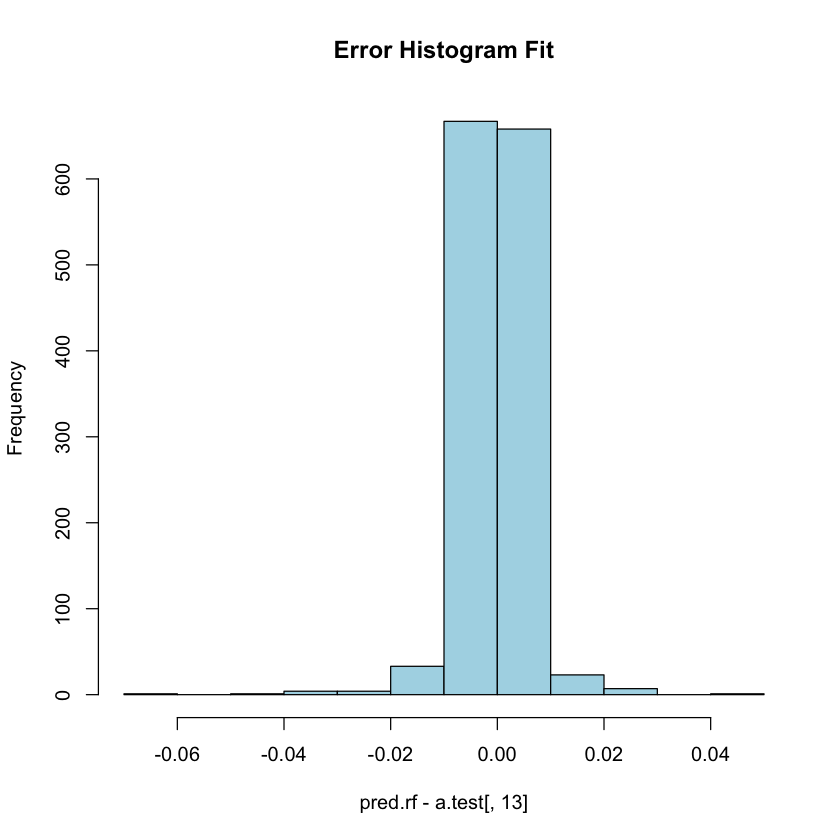

                    ME        RMSE         MAE        MPE     MAPE
Test set -0.0005309723 0.009816182 0.006662522 -0.3100558 3.839004


Warning message in temp[1] <- a.lm:
“被替换的项目不是替换值长度的倍数”

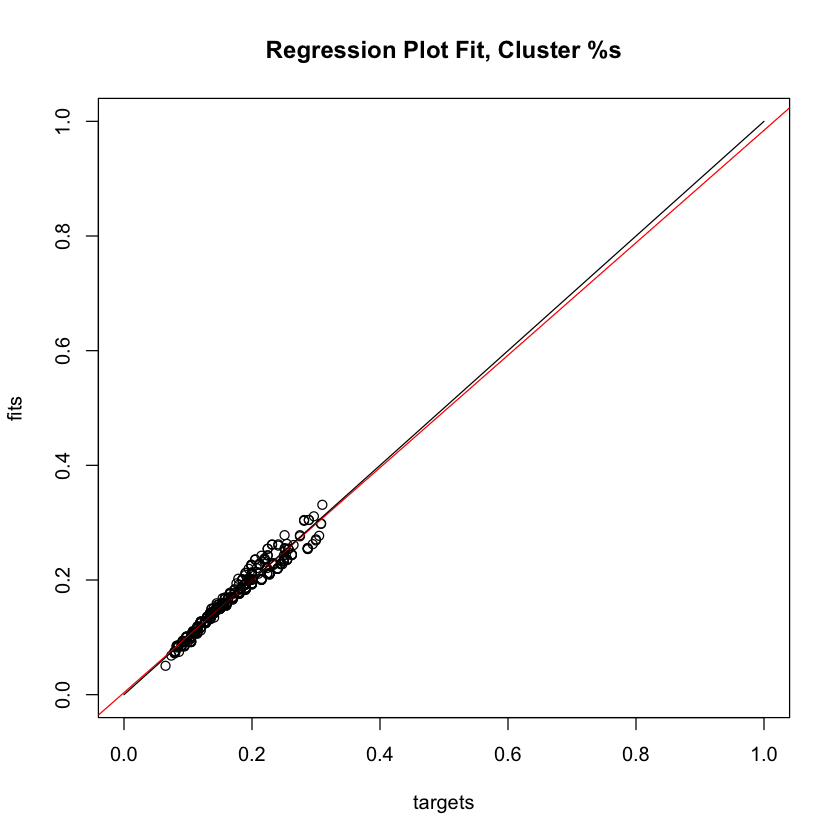

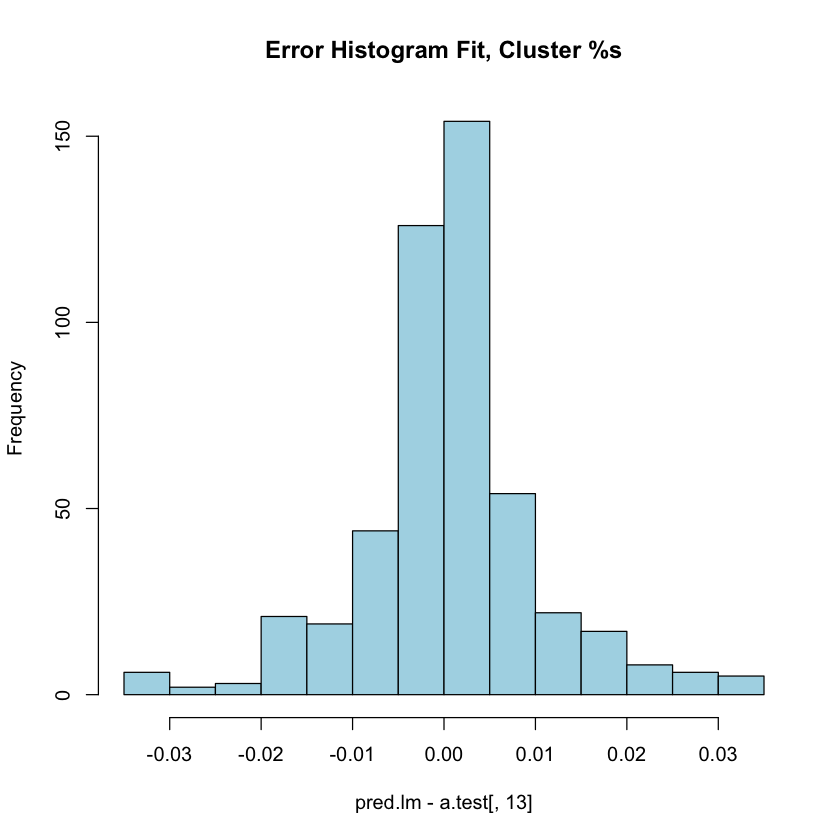

                    ME        RMSE         MAE        MPE     MAPE
Test set -0.0001998471 0.009941521 0.006662684 -0.3627558 3.870145


Warning message in temp[2] <- a.rf:
“被替换的项目不是替换值长度的倍数”

SNNS network definition file V1.4-3D
generated at Sun Nov 19 14:26:24 2017

network name : RSNNS_untitled
source files :
no. of units : 30
no. of connections : 224
no. of unit types : 0
no. of site types : 0


learning function : Std_Backpropagation
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0.00000 |  0.00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName                  | act      | bias     | st | position | act func     | out func | sites
----|----------|---------------------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_annual_inc          | 91000.00000 | -0.10736 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_dti  

Warning message in temp[3] <- a.nn:
“被替换的项目不是替换值长度的倍数”

                   ME       RMSE        MAE       MPE    MAPE
Test set -0.003183306 0.05243619 0.04196466 -11.56845 28.6446


Warning message in temp[4] <- a.knn:
“被替换的项目不是替换值长度的倍数”Warning message in model[i] <- temp:
“被替换的项目不是替换值长度的倍数”

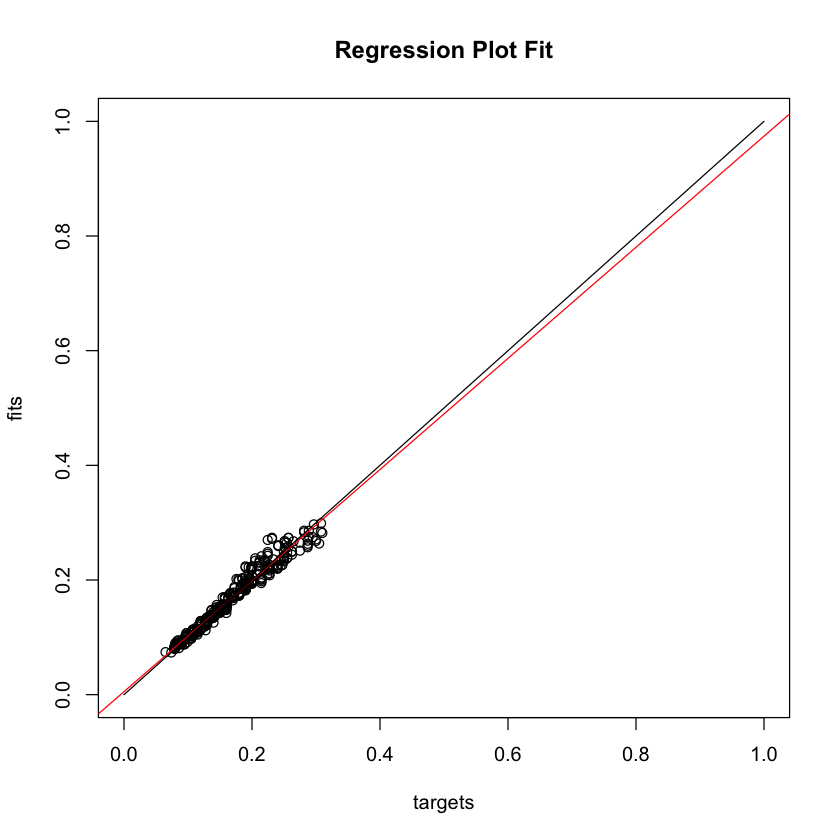

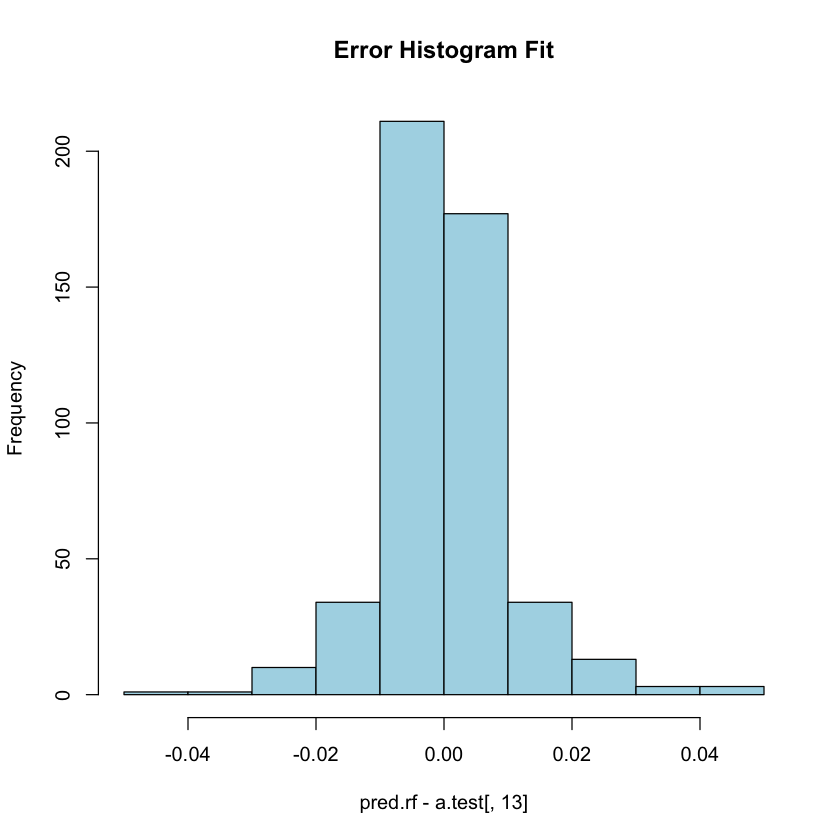

In [29]:
model <- NULL

for (i in term_list){
    
    temp <- NULL
    
    a <- x[x$term == i,]
    set.seed(12345)
    train<-sample(1:nrow(a),round(nrow(a)*7/10))
    a.train <- a[train,-c(9,15)]
    a.test <- a[-train,-c(9,15)]
    
    ### Linear regression ###
    sprintf("*** Linear Regression, Cluster %s ***",i)
    a.lm <- lm(f,data=a.train,na.action=na.omit)
    print(summary(a.lm))

    # Prediction
    pred.lm <- predict(a.lm,a.test)
    
    # Plot
    plotRegressionError(a.test[,13], pred.lm, main="Regression Plot Fit, Cluster %s" )
    hist(pred.lm-a.test[,13], col="lightblue", main="Error Histogram Fit, Cluster %s" )

    # Metrics
    sprintf("Cluster %s", i)
    print(accuracy(pred.lm, a.test[,13]))

    # Save the model
    temp[1] <- a.lm


    ### Random forest ###
    sprintf("*** Random Forest, Cluster %s ***", i)
    a.rf <- randomForest(f, data=a.train, ntree=15, importance=TRUE)
    summary(a.rf)

    # Prediction
    pred.rf <- predict(a.rf,a.test)

    # Plot
    plotRegressionError(a.test[,13], pred.rf, main="Regression Plot Fit")
    hist(pred.rf-a.test[,13], col="lightblue", main="Error Histogram Fit")

    # Metrics
    print(accuracy(pred.rf, a.test[,13]))
    
    # Save
    temp[2] <- a.rf

    
    ### Neural network ###
    sprintf("*** Neural Network, Cluster %s ***", i)    
    a.nn <- mlp(a.train,a.train[,13], size=16, maa_iter=200)
    summary(a.nn)
    
    # Prediction
    pred.nn <- predict(a.nn, a.test)
    
    # Save 
    temp[3] <- a.nn

    
    ### KNN ###
    sprintf("*** KNN, Cluster %s ***", i)
    a.knn <- knn.reg(train=a.train[,-13], test=a.test[,-13], y=a.train[,13], k=10)
    summary(a.knn)
    
    # Metrics
    print(accuracy(a.knn$pred, a.test[,13]))
    
    # Save 
    temp[4] <- a.knn
    
    
    model[i] <- temp

}